In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
"""settingup matplotlib for jupyter notebook"""
import mpld3
mpld3.enable_notebook()
plt.rcParams['figure.figsize']=[9.5,6]

In [3]:
def saveDataFrame(dataframes,filepath,names):
    writer = pd.ExcelWriter(filepath, engine='xlsxwriter')
    for df,sname in zip(dataframes,names):
        df.to_excel(writer,sheet_name=sname)   
    writer.save()

In [4]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
def drawGraph(cdf,rdf,figpath):
    mycols=list(cdf.columns)
    labels= mycols[3:]
    ylabel=cdf.iloc[0,1]
    completed=list(cdf.iloc[0,3:])
    remaining=list(rdf.iloc[0,3:])
    fig,ax=plt.subplots()
    width=0.75
    xvals=[1,2,3,4,5,6,7,8]
    rects1=ax.bar(xvals,completed,width,label="complted")
    rects2=ax.bar(xvals,remaining,width,bottom=completed,label="remaining")
    plt.xticks(xvals,labels)
    ax.set_ylabel(completed)
    #ax.yaxis.grid()
    #ax.legend()
    autolabel(rects1,ax)
    #autolabel(rects2,ax)
    plt.ylabel(completed)
    plt.show()
    print(labels)
    #print(vals)
    plt.savefig(figpath)
def calcualteRmainingDf(indf):
    out_df=indf.copy(deep=True)
    for index,row in indf.iterrows():
        total=indf.iloc[index,2]
        for i in range(3,11):
            out_df.iloc[index,i]=total-indf.iloc[index,i]
    return out_df

E:\Website_26_07_2020\cmis6\Civilworks cost\PPT Progress Review Meeting\Component Wise Cost Brackup_ 08.11.2020.xlsx


C:\Users\Home\.conda\envs\gisenv\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\Home\.conda\envs\gisenv\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\Home\.conda\envs\gisenv\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\Home\.conda\envs\gisenv\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\Home\.conda\envs\gisenv\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\Home\.conda\envs\gisenv\lib\sit

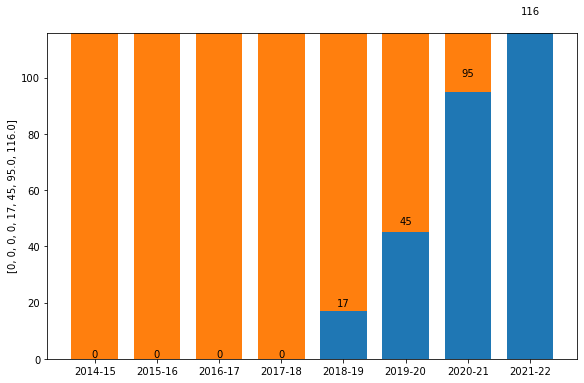

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']


<Figure size 684x432 with 0 Axes>

In [5]:
myfolder=r'E:\Website_26_07_2020\cmis6\Civilworks cost\PPT Progress Review Meeting'
inpath=os.path.join(myfolder,'Component Wise Cost Brackup_ 08.11.2020.xlsx')
outpath=os.path.join(myfolder,"dframes.xlsx")
figpath=os.path.join(myfolder,"graph1.png")
print(inpath)
sheetName="Input_data"
completed_df=pd.read_excel(inpath,sheet_name=sheetName)
completed_df.fillna(0,inplace=True)
completed_df
remaining_df=calcualteRmainingDf(completed_df)
drawGraph(completed_df,remaining_df,figpath)

In [6]:
myframes=[]
mynames=[]
myframes.append(completed_df)
mynames.append("completed")
myframes.append(remaining_df)
mynames.append("remaining")
saveDataFrame(myframes,outpath,mynames)
